In [5]:
import numpy as np; import matplotlib.pyplot as plt

In [3]:
dx = float(input ("mesh size =")); dt = float(input("time step="))

mesh size =0.001
time step=0.0005


In [4]:
smax = float(input ("max step ="))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\LG\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\LG\AppData\Local\Temp\ipykernel_16756\23646841.py", line 1, in <module>
    smax = float(input ("max step ="))
  File "C:\Users\LG\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 1177, in raw_input
    return self._input_request(
  File "C:\Users\LG\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 1219, in _input_request
    raise KeyboardInterrupt("Interrupted by user") from None
KeyboardInterrupt: Interrupted by user

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\LG\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During ha

TypeError: object of type 'NoneType' has no len()

In [6]:
x = np.arange(0,1+dx,dx); a = dt/dx

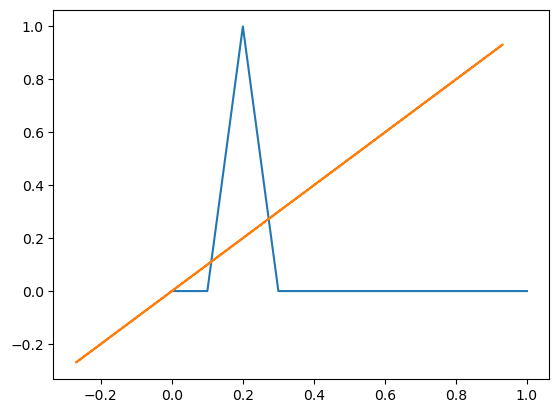

In [9]:
u = np.exp(-(x-0.2)**2/0.02**2)
u0 = 0*x;
u0[0:]= u[0:] # copy the initial signal for alter comparison
u[0] = u[len(u)-1] = 0.0

s=0
while s<=smax :
    u[1:-1] = u[1:-1]-0.5*a*(u[2:]-u[0:-2])
    s+=1

    
plt.plot(x,u0,x,u)

### FTCS in python

Example 1. Create a code to solve the continuity equation (or the right-going 
wave equation) with v=1 by the FTCS method. Set the domain length to 1,
with the boundary values at both ends be zero. Build a pulse of Gaussianshape, centered at x=0.2 and the half-width at 1/e to be 0.02. Run the code 
with mesh size=0.001, time step=0.0005, up to 100 steps.


In [12]:
dx=0.001; dt=0.0005;

In [13]:
x=np.arange(0,1+dx,dx); a=dt/dx # simulation domain x and alpha parameter (a)
u=np.exp(-(x-0.2)**2/0.02**2) # initial Gaussian pulse centered at 0.2.
u0=np.exp(-(x-0.2)**2/0.02**2) # backup a copy of initial signal for comparison

In [14]:
u[0]=u[len(u)-1]=0.0 # Boundary condition
s=0 # Loop from here
while s<=100: # s represents num. steps
    u[1:-1] = u[1:-1]-0.5*a*(u[2:]-u[0:-2]) # Calculate from j=1 thru n-2. 
    s+=1 # next step

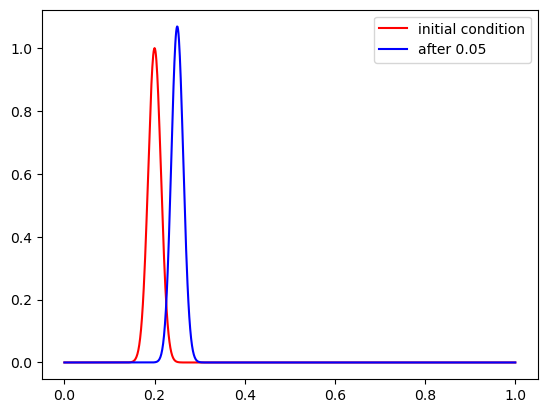

In [22]:
plt.plot(x,u0,label = 'initial condition', color = 'r')
plt.plot(x,u,label = 'after 0.05', color ='b')
plt.legend()
plt.show()

### BTCS in python 

Example 2. Repeat Exercise 1, but this time, with BTCS.

In [23]:
dx=0.001; dt=0.0005; smax=100
# Initialization of x, alpha(=dt/dx), number of meshes (N), and initial pulse (u)

In [24]:
x=np.arange(0,1+dx,dx); a=dt/dx; N=1/dx

In [25]:
u=np.exp(-(x-0.2)**2/0.02**2);

In [26]:
u0=np.exp(-(x-0.2)**2/0.02**2); # Make a copy of initial pulse for later use

In [27]:
u[0]=u[len(u)-1]=0.0 # Boundary condition

In [28]:
# Make the matrix triangular.
d=[0,1]; i=1; y=1
while i<N:
    y=1+0.25*a*a/y; d.append(y); i+=1

In [30]:
s=0 
while s<=smax :
    i =1 
    while i < N-1 :
        u[i+1] += 0.5*u[i]*a/d[i]; i+=1 #update the source term
    while i>=1:
        u[i]=(u[i]-0.5*a*u[i+1])/d[i]; i-=1 # back substitution
    s += 1

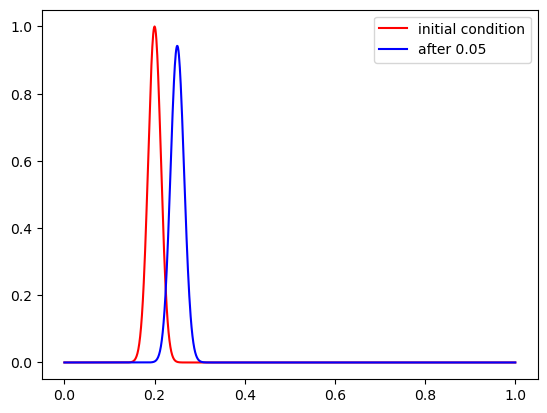

In [31]:
plt.plot(x,u0,label = 'initial condition', color = 'r')
plt.plot(x,u,label = 'after 0.05', color ='b')
plt.legend()
plt.show()